Import files

In [130]:
import pandas as pd
import numpy as np

Read csv file

In [131]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('https://raw.githubusercontent.com/upul/WhiteBoard/master/data/daily-minimum-temperatures-in-me.csv', error_bad_lines=False)
series


b'Skipping line 3653: expected 2 fields, saw 3\n'


,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [132]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Date                                                           3650 non-null   object
 1   Daily minimum temperatures in Melbourne, Australia, 1981-1990  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


Rename columns

In [133]:
series = series.rename(columns={"Daily minimum temperatures in Melbourne, Australia, 1981-1990" : "temperature"})
series

,Date,temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


Remove unwanted characters

In [134]:
series['temperature'] = series['temperature'].map(lambda x: x.lstrip('?'))

In [135]:
series.temperature = series.temperature.astype(float)
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3650 non-null   object 
 1   temperature  3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


Graphics

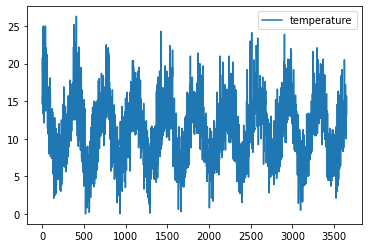

In [136]:
series.plot()
pyplot.show()

Rename columns

In [137]:
series.rename(columns={'Date':'ds', 'temperature': 'y'}, inplace=True)
series

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


Graph time series

Text(0, 0.5, 'y')

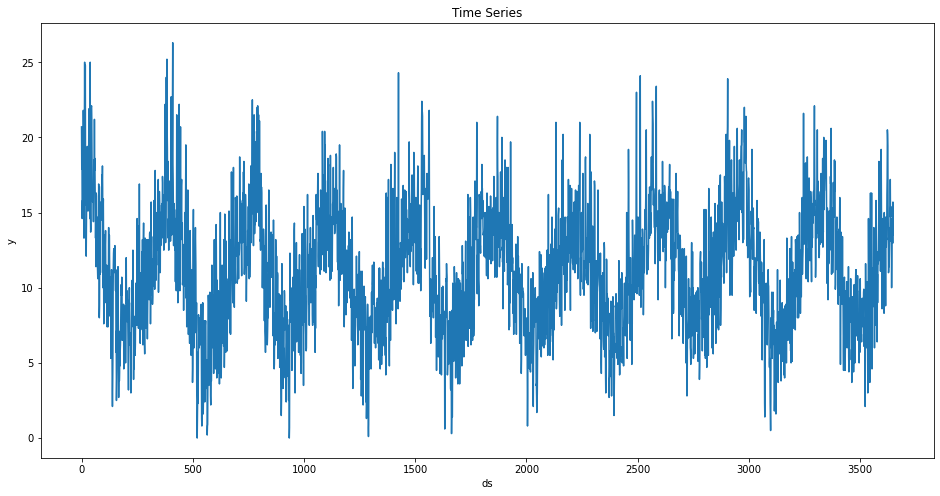

In [138]:
import matplotlib.pyplot as plt

series['y'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("ds") 
plt.ylabel("y")

Split dataset

In [139]:
X_train = series.loc[series["ds"]<"1990-01-01"]
X_val  = series.loc[series["ds"]>="1990-01-01"]

FB Prophet

In [140]:
from fbprophet import Prophet

model = Prophet()
model.fit(X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict on validation set

In [141]:
forecast = model.predict(X_val.drop(columns="y"))
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,11.442605,11.489211,17.957248,11.442605,11.442605,3.447112,3.447112,3.447112,0.043658,0.043658,0.043658,3.403454,3.403454,3.403454,0.0,0.0,0.0,14.889717
1,1990-01-02,11.442525,11.516917,18.410301,11.442525,11.442525,3.573670,3.573670,3.573670,0.107264,0.107264,0.107264,3.466407,3.466407,3.466407,0.0,0.0,0.0,15.016195
2,1990-01-03,11.442444,11.595676,18.621484,11.442444,11.442444,3.650188,3.650188,3.650188,0.123062,0.123062,0.123062,3.527126,3.527126,3.527126,0.0,0.0,0.0,15.092632
3,1990-01-04,11.442364,11.396746,18.315830,11.442364,11.442364,3.558361,3.558361,3.558361,-0.026445,-0.026445,-0.026445,3.584806,3.584806,3.584806,0.0,0.0,0.0,15.000724
4,1990-01-05,11.442283,11.884366,18.452233,11.442283,11.442283,3.628737,3.628737,3.628737,-0.009969,-0.009969,-0.009969,3.638705,3.638705,3.638705,0.0,0.0,0.0,15.071020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1990-12-27,11.413578,10.851748,17.896534,11.321732,11.517067,3.043453,3.043453,3.043453,-0.026445,-0.026445,-0.026445,3.069898,3.069898,3.069898,0.0,0.0,0.0,14.457031
361,1990-12-28,11.413497,11.129466,18.227607,11.321035,11.517582,3.120791,3.120791,3.120791,-0.009969,-0.009969,-0.009969,3.130760,3.130760,3.130760,0.0,0.0,0.0,14.534288
362,1990-12-29,11.413416,10.959819,18.046011,11.320349,11.518078,3.144874,3.144874,3.144874,-0.048855,-0.048855,-0.048855,3.193729,3.193729,3.193729,0.0,0.0,0.0,14.558291
363,1990-12-30,11.413336,11.250508,18.078734,11.319685,11.518296,3.069336,3.069336,3.069336,-0.188715,-0.188715,-0.188715,3.258051,3.258051,3.258051,0.0,0.0,0.0,14.482671


In [142]:
# Calculating the RMSE of the model
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(X_val['y'], forecast['yhat'])) 
print(rms)

2.515228523517092


In [143]:
forecast.yhat[forecast.yhat < 0] = 0

df_val=pd.DataFrame({'actual': X_val.y.values, 'predicted': forecast.yhat.values.astype(float)})
df_val.reset_index(drop=True, inplace=True)
df_val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,actual,predicted
0,14.8,14.889717
1,13.3,15.016195
2,15.6,15.092632
3,14.5,15.000724
4,14.3,15.071020
...,...,...
360,14.0,14.457031
361,13.6,14.534288
362,13.5,14.558291
363,15.7,14.482671


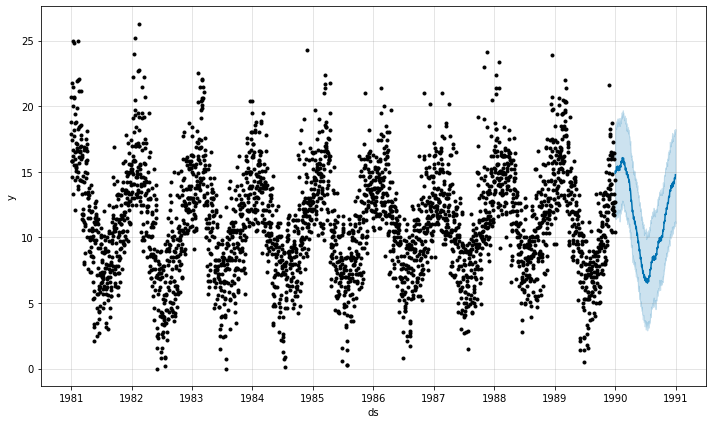

In [144]:
fig1 = model.plot(forecast)

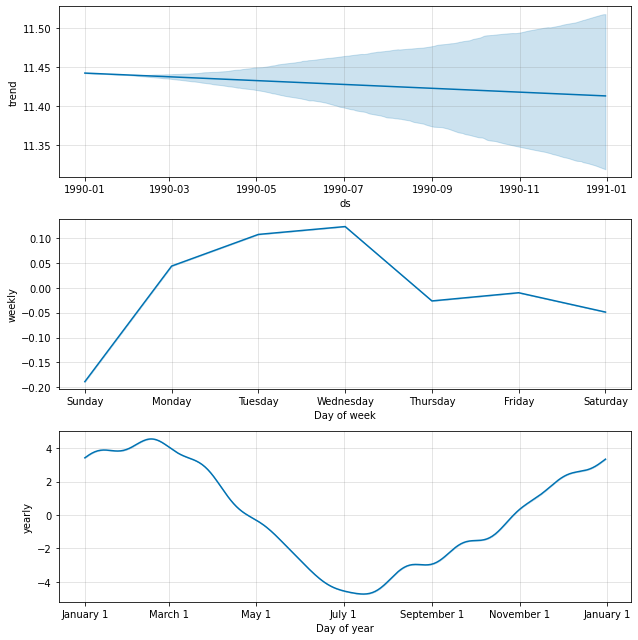

In [145]:
fig2 = model.plot_components(forecast)

In [146]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [147]:
plot_components_plotly(model, forecast)

Statsmodels

Naive approach

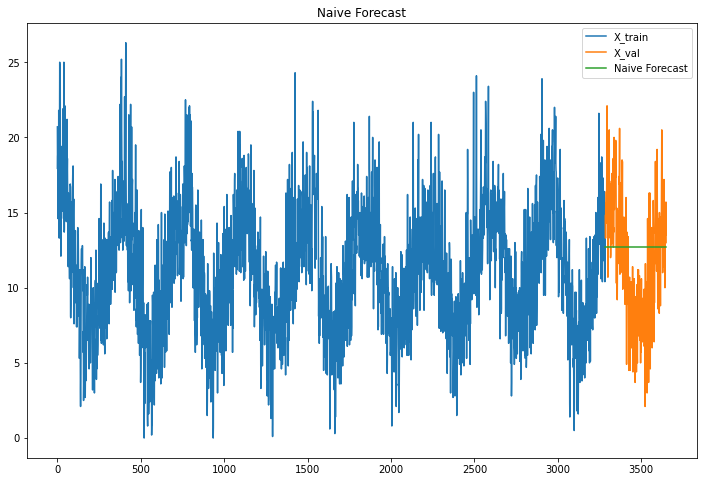

In [148]:
#naive approach
dd= np.asarray(X_train.y) 
y_hat = X_val.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [149]:
y_hat

,ds,y,naive
3285,1990-01-01,14.8,12.7
3286,1990-01-02,13.3,12.7
3287,1990-01-03,15.6,12.7
3288,1990-01-04,14.5,12.7
3289,1990-01-05,14.3,12.7
...,...,...,...
3645,1990-12-27,14.0,12.7
3646,1990-12-28,13.6,12.7
3647,1990-12-29,13.5,12.7
3648,1990-12-30,15.7,12.7


In [150]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(X_val.y, y_hat.naive)) 
print(rms)

3.991597338794144


Auto Regression

In [151]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
from datetime import datetime

start_index = X_val.index.min()
end_index = X_val.index.max()

# fit model
model_AR = AR(X_train.y)
model_fit_AR = model_AR.fit()
# make prediction
yhat = model_fit_AR.predict(start=start_index, end=end_index)
yhat = yhat.astype(float)
print(yhat)

3285    12.746935
3286    12.959584
3287    13.073377
3288    13.025790
3289    13.173018
          ...    
3645    11.018943
3646    11.018138
3647    11.017341
3648    11.016550
3649    11.015766
Length: 365, dtype: float64


In [152]:
df_val = pd.DataFrame({'Actual': X_val['y'], 'Predicted': yhat})
df_val

,Actual,Predicted
3285,14.8,12.746935
3286,13.3,12.959584
3287,15.6,13.073377
3288,14.5,13.025790
3289,14.3,13.173018
...,...,...
3645,14.0,11.018943
3646,13.6,11.018138
3647,13.5,11.017341
3648,15.7,11.016550


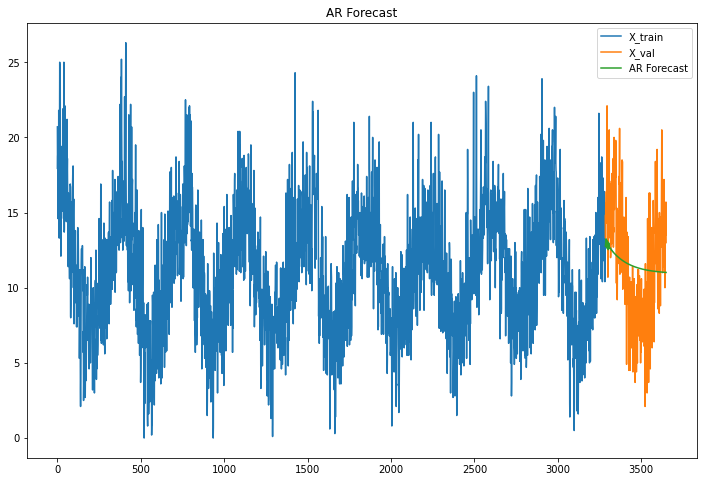

In [153]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(yhat, label='AR Forecast') 
plt.legend(loc='best') 
plt.title("AR Forecast") 
plt.show()

In [154]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(X_val['y'], yhat)) 
print(rms)

3.634669088254573


Moving Average

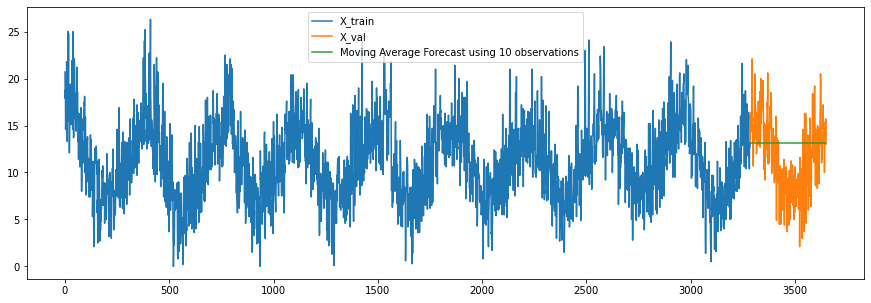

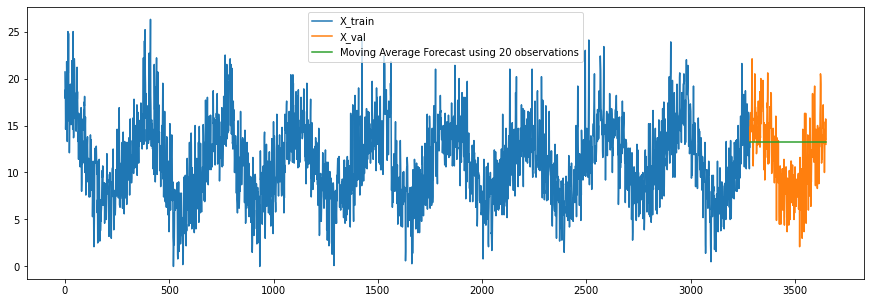

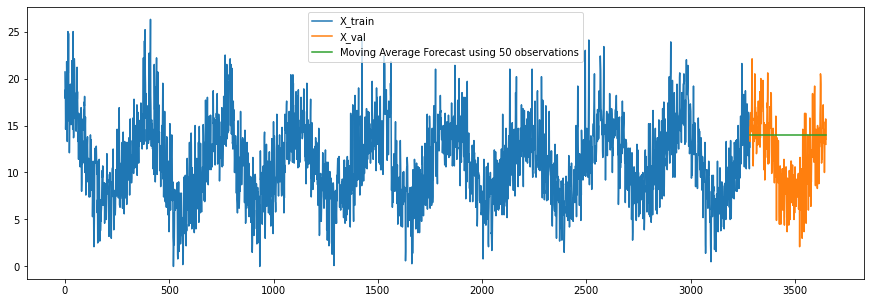

In [155]:
#moving average
# Considering rolling mean for last 10, 20, 50 days and visualize the results.
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [156]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, y_hat_avg.moving_avg_forecast)) 
print(rms)

4.497510495544619


In [157]:
#select last column from array
y_hat_avg.iloc[:,-1:] = y_hat_avg.iloc[:,-1:].astype(float)
print(y_hat_avg.iloc[:,-1:])

      moving_avg_forecast
3285               13.984
3286               13.984
3287               13.984
3288               13.984
3289               13.984
...                   ...
3645               13.984
3646               13.984
3647               13.984
3648               13.984
3649               13.984

[365 rows x 1 columns]


ARIMA

In [158]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA

start_index = X_val.index.min()
end_index = X_val.index.max()

# fit model
model_ARMA =ARMA(X_train.y, order=(2, 1))
model_fit_ARMA = model_ARMA.fit(disp=False)
# make prediction
yhat = model_fit_ARMA.predict(start=start_index, end=end_index, dynamic=False)
yhat = yhat.astype(float)
print(yhat)

3285    12.999965
3286    13.131498
3287    13.185399
3288    13.203546
3289    13.205250
          ...    
3645    11.606892
3646    11.605899
3647    11.604912
3648    11.603933
3649    11.602961
Length: 365, dtype: float64


In [159]:
df_val=pd.DataFrame({'Actual': X_val['y'].values, 'Predicted': yhat})
df_val

,Actual,Predicted
3285,14.8,12.999965
3286,13.3,13.131498
3287,15.6,13.185399
3288,14.5,13.203546
3289,14.3,13.205250
...,...,...
3645,14.0,11.606892
3646,13.6,11.605899
3647,13.5,11.604912
3648,15.7,11.603933


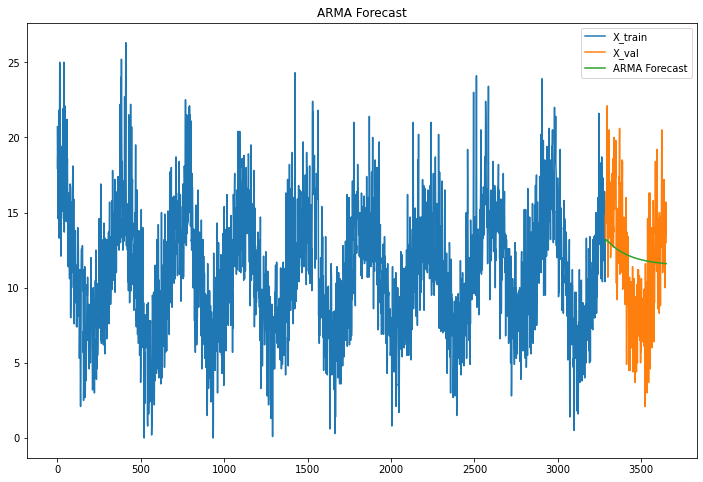

In [160]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(yhat, label='ARMA Forecast') 
plt.legend(loc='best') 
plt.title("ARMA Forecast") 
plt.show()

In [161]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(X_val['y'], yhat)) 
print(rms)

3.705108458757144


Simple Exponential Smoothing

In [162]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

start_index = X_val.index.min()
end_index = X_val.index.max()

# fit model
model_SES = SimpleExpSmoothing(X_train.y)
model_fit_SES = model_SES.fit(smoothing_level=0.6,optimized=False)
# make prediction
yhat = model_fit_SES.predict(start=start_index, end=end_index)
yhat = yhat.astype(int)

In [163]:
df_val=pd.DataFrame({'Actual': X_val['y'].values, 'Predicted': yhat})
df_val

,Actual,Predicted
3285,14.8,12
3286,13.3,12
3287,15.6,12
3288,14.5,12
3289,14.3,12
...,...,...
3645,14.0,12
3646,13.6,12
3647,13.5,12
3648,15.7,12


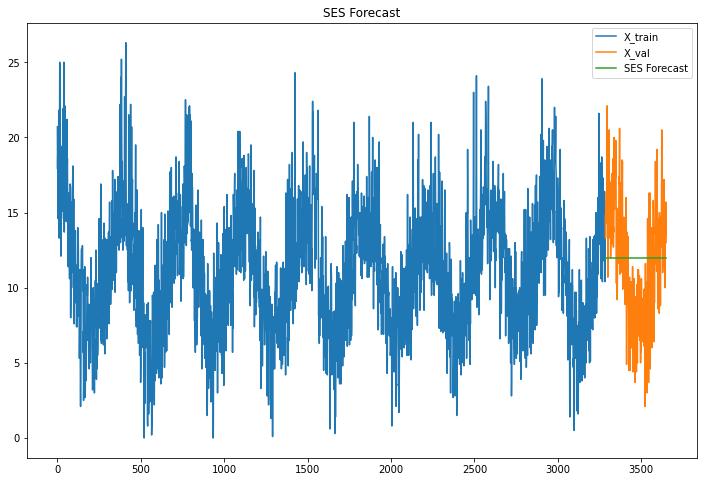

In [164]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(yhat, label='SES Forecast') 
plt.legend(loc='best') 
plt.title("SES Forecast") 
plt.show()

In [165]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(X_val['y'], yhat)) 
print(rms)

3.8704358892252353


Holt's Linear Trend Model

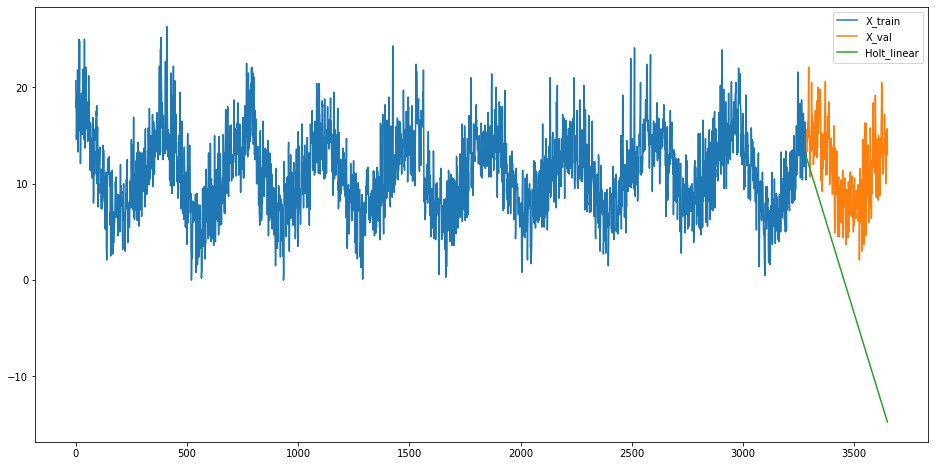

In [166]:
#holt's linear trend model
from statsmodels.tsa.api import Holt

y_hat_avg = X_val.copy() 
fit1 = Holt(np.asarray(X_train['y'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(X_val)) 
plt.figure(figsize=(16,8)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [167]:
# Calculating the RMSE of the model
rms = sqrt(mean_squared_error(X_val.y, y_hat_avg.Holt_linear)) 
print(rms)

14.88506275555595


In [168]:
y_hat_avg.Holt_linear = y_hat_avg.Holt_linear.astype(float)
y_hat_avg.Holt_linear

3285    12.730346
3286    12.654914
3287    12.579481
3288    12.504049
3289    12.428616
          ...    
3645   -14.425355
3646   -14.500787
3647   -14.576220
3648   -14.651652
3649   -14.727085
Name: Holt_linear, Length: 365, dtype: float64

Holt Winters Exponential Smoothing

In [169]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

start_index = X_val.index.min()
end_index = X_val.index.max()

# fit model
model_HWES = ExponentialSmoothing(X_train.y)
model_fit_HWES = model_HWES.fit(smoothing_level = 0.3,smoothing_slope = 0.1)
# make prediction
yhat = model_fit_HWES.predict(start=start_index, end=end_index)
yhat = yhat.astype(float)
print(yhat)

3285    12.957812
3286    12.957812
3287    12.957812
3288    12.957812
3289    12.957812
          ...    
3645    12.957812
3646    12.957812
3647    12.957812
3648    12.957812
3649    12.957812
Length: 365, dtype: float64


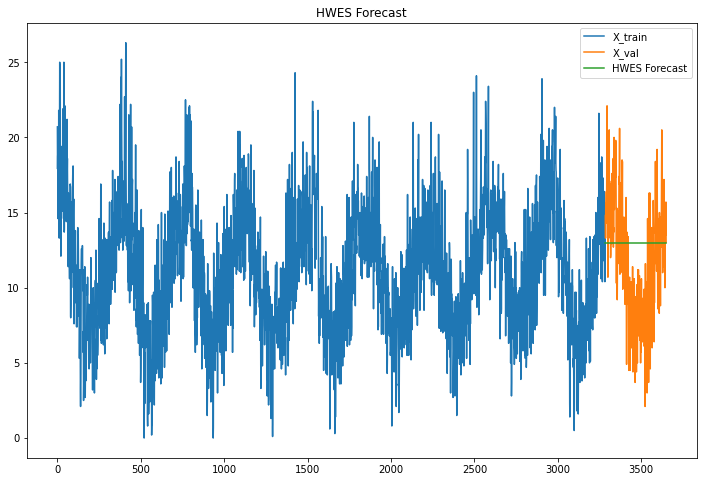

In [170]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(yhat, label='HWES Forecast') 
plt.legend(loc='best') 
plt.title("HWES Forecast") 
plt.show()

In [171]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(X_val['y'], yhat)) 
print(rms)

4.065786649751259
